In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:

data_matrix = pd.read_csv('./data_matrix.csv')
classes = pd.read_csv('./classes.csv', index_col=0)['class']


In [22]:

# ---------------
# Task 1: Calculate the standardized data matrix.
# ---------------
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd


In [23]:
# ---------------
# Task 2: Perform PCA by fitting and transforming the data matrix.
# ---------------
# Find the principal components
pca = PCA()


In [24]:
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')


Number of features in the data matrix: 11
Number of features in the principal components: 11


In [25]:
# ---------------
# Task 3: Calculate the eigenvalues from the singular values and extract the eigenvectors.
# ---------------
# Find the eigenvalues from the singular values
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2
# Eigenvectors are in the property `.components_` as row vectors. To turn them into column vectors, transpose them using the NumPy method `.T`.
eigenvectors = pca.components_


In [26]:
# ---------------
# Task 4: Extract the variance ratios, which are equivalent to the eigenvalue proportions we calculated earlier.
# ---------------
# Get the variance ratios from the `explained_variance_ratio_`
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100


In [27]:

# ---------------
# Task 5: Perform PCA once again but with 2 components
# ---------------
# Calculating principal components with 2 components
# Initialize a PCA object with 2 components
pca = PCA(n_components=2) 
 
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
 
# Print the DataFrame
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')



Number of Principal Components Features: 2
Number of Original Data Features: 11


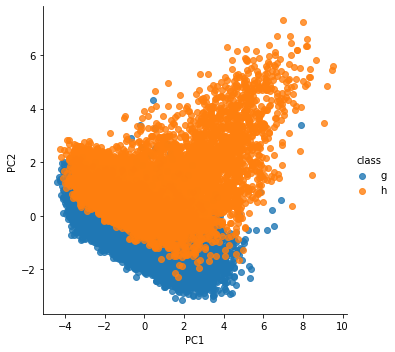

In [28]:

# Task 6: Plot the principal components and have its class as its hue to see if clustering of any kind has occured.
# ---------------
# Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()


# We will use the one-hot-encoded classes as the y
y = classes.astype('category').cat.codes
 
 

In [29]:
# ---------------
# Task 7: Fit the transformed features onto the classifier and generate a score.
# ---------------
# Get principal components with 2 features 
# Perform PCA using 2 components
pca_1 = PCA(n_components=2) 
 
# Use the principal components as X and split the data into 33% testing and the rest training
X = pca_1.fit_transform(data_matrix_standardized) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X, y) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')


Score for model with 2 PCA features: 0.8652222399235303


C:\Users\EmmanuelOkyereGyaten\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
